# Running Window Alpha Analysis



## Nocodazole Treatment

In [1]:
import scipy.stats as stats
import numpy as np
import pandas as pd
from tkinter import filedialog
import matplotlib.pyplot as plt
import seaborn as sns
import os
from math import ceil
from rich.progress import track
from statannot import add_stat_annotation


In [2]:
# Define the function to calculate the fraction of trajectories meeting the condition
def calculate_fraction_of_trajectories(df, alpha_threshold=1.5, min_windows=5):
    counts = df[df['alpha'] > alpha_threshold].groupby('TRACK_ID')['alpha'].count()
    return (counts >= min_windows).mean()

In [3]:
# Use file dialog to select CSV files for each condition
csv_files_1 = filedialog.askopenfilenames(
    title="Select CSV Files for No drug_2x",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_2 = filedialog.askopenfilenames(
    title="Select CSV Files for Nocodazole_30 mins",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_3 = filedialog.askopenfilenames(
    title="Select CSV Files for Nocodazole_60 mins",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)

In [4]:
# Calculate the fraction for all the selected files for each condition
fractions_1 = {file: calculate_fraction_of_trajectories(pd.read_csv(file)) for file in csv_files_1}
fractions_2 = {file: calculate_fraction_of_trajectories(pd.read_csv(file)) for file in csv_files_2}
fractions_3 = {file: calculate_fraction_of_trajectories(pd.read_csv(file)) for file in csv_files_3}


In [5]:
# Create DataFrames for the calculated fractions and assign labels
fractions_df1 = pd.DataFrame(list(fractions_1.items()), columns=["filename", "fraction_alpha"])
fractions_df1["label"] = "No drug_2x"

fractions_df2 = pd.DataFrame(list(fractions_2.items()), columns=["filename", "fraction_alpha"])
fractions_df2["label"] = "Nocodazole_30 mins"

fractions_df3 = pd.DataFrame(list(fractions_3.items()), columns=["filename", "fraction_alpha"])
fractions_df3["label"] = "Nocodazole_60 mins"

In [6]:
# Concatenate the dataframes into a single dataframe and save as CSV
data = pd.concat([fractions_df1, fractions_df2, fractions_df3], ignore_index=True)
save_path = r"Z:\Bisal_Halder_turbo\PROCESSED_DATA\Trial_analysis"
csv_file_path = os.path.join(save_path, "fraction_trajectories_Noco_alpha gt 1.5_atleast for 5 windows.csv")
data.to_csv(csv_file_path, index=False)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

No drug_2x v.s. Nocodazole_30 mins: Welch's t-test independent samples, P_val=1.369e-02 stat=2.662e+00
Nocodazole_30 mins v.s. Nocodazole_60 mins: Welch's t-test independent samples, P_val=8.351e-01 stat=2.111e-01
No drug_2x v.s. Nocodazole_60 mins: Welch's t-test independent samples, P_val=2.230e-02 stat=2.431e+00


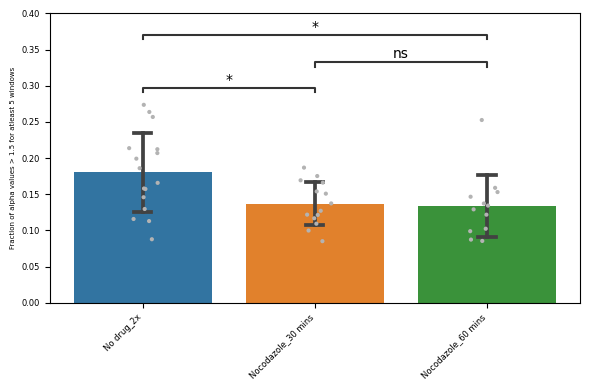

In [7]:
# Plotting
plt.figure(figsize=(6, 4),)
ax = sns.barplot(data=data, x="label", y="fraction_alpha", ci='sd', capsize=0.1, estimator=np.mean)
sns.stripplot(data=data, x="label", y="fraction_alpha", color="0.7", size=3)

# Add statistical annotations
box_pairs = [("No drug_2x", "Nocodazole_30 mins"), ("No drug_2x", "Nocodazole_60 mins"), ("Nocodazole_30 mins", "Nocodazole_60 mins")]
test_stats = add_stat_annotation(ax, data=data, x="label", y="fraction_alpha", box_pairs=box_pairs, test="t-test_welch", comparisons_correction=None, text_format="star", loc="inside", verbose=2)

plt.xticks(rotation=45, ha="right", fontsize=6)
plt.yticks(fontsize=6)
plt.ylabel("Fraction of alpha values > 1.5 for atleast 5 windows", fontsize=5)
plt.xlabel("")
plt.ylim(0, None)
plt.tight_layout()
plt.show()

In [2]:
def calculate_fraction_of_windows_above_threshold(df, alpha_threshold=1.5):
    return (df['alpha'] > alpha_threshold).mean()

In [3]:
# Use file dialog to select CSV files for each condition
csv_files_1 = filedialog.askopenfilenames(
    title="Select CSV Files for No drug_2x",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_2 = filedialog.askopenfilenames(
    title="Select CSV Files for Nocodazole_30 mins",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_3 = filedialog.askopenfilenames(
    title="Select CSV Files for Nocodazole_60 mins",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)

In [4]:
# Calculate the fraction of windows greater than 1.5 for each file
fractions_1 = {file: calculate_fraction_of_windows_above_threshold(pd.read_csv(file)) for file in csv_files_1}
fractions_2 = {file: calculate_fraction_of_windows_above_threshold(pd.read_csv(file)) for file in csv_files_2}
fractions_3 = {file: calculate_fraction_of_windows_above_threshold(pd.read_csv(file)) for file in csv_files_3}



In [5]:
# Create DataFrames for the calculated fractions and assign labels
fractions_df1 = pd.DataFrame(list(fractions_1.items()), columns=["filename", "fraction_alpha"])
fractions_df1["label"] = "No drug_2x"

fractions_df2 = pd.DataFrame(list(fractions_2.items()), columns=["filename", "fraction_alpha"])
fractions_df2["label"] = "Nocodazole_30 mins"

fractions_df3 = pd.DataFrame(list(fractions_3.items()), columns=["filename", "fraction_alpha"])
fractions_df3["label"] = "Nocodazole_60 mins"

In [6]:
# Concatenate the dataframes into a single dataframe
data = pd.concat([fractions_df1, fractions_df2, fractions_df3], ignore_index=True)

# Save the concatenated dataframe
save_path = r"Z:\Bisal_Halder_turbo\PROCESSED_DATA\Trial_analysis"
csv_file_path = os.path.join(save_path, "fraction_windows_alpha_greater_than_1.5.csv")
data.to_csv(csv_file_path, index=False)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

No drug_2x v.s. Nocodazole_30 mins: Welch's t-test independent samples, P_val=2.150e-02 stat=2.443e+00
Nocodazole_30 mins v.s. Nocodazole_60 mins: Welch's t-test independent samples, P_val=6.003e-01 stat=5.313e-01
No drug_2x v.s. Nocodazole_60 mins: Welch's t-test independent samples, P_val=1.023e-02 stat=2.769e+00


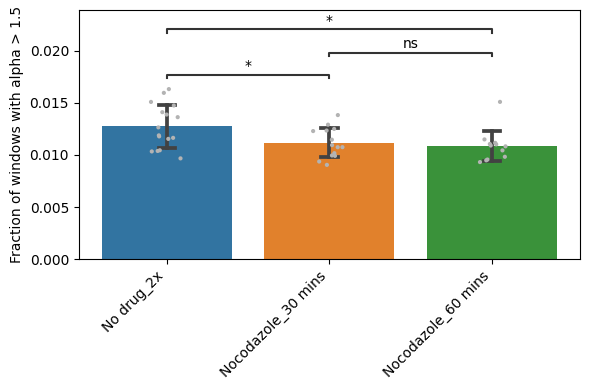

In [7]:
# Plotting
plt.figure(figsize=(6, 4))
ax = sns.barplot(data=data, x="label", y="fraction_alpha", order=data["label"].unique(), ci='sd', capsize=0.1)
sns.stripplot(data=data, x="label", y="fraction_alpha", color="0.7", size=3, order=data["label"].unique())

# Add statistical annotations
box_pairs = [
    ("No drug_2x", "Nocodazole_30 mins"),
    ("No drug_2x", "Nocodazole_60 mins"),
    ("Nocodazole_30 mins", "Nocodazole_60 mins"),
]
test_stats = add_stat_annotation(ax, data=data, x="label", y="fraction_alpha", box_pairs=box_pairs, test="t-test_welch", comparisons_correction=None, text_format="star", loc="inside", verbose=2)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Fraction of windows with alpha > 1.5")
plt.xlabel("")
plt.ylim(0, None)
plt.tight_layout()
plt.show()

## Latrunculin A Treatment

In [4]:
# Define the function to calculate the fraction of trajectories meeting the condition
def calculate_fraction_of_trajectories(df, alpha_threshold=1.5, min_windows=5):
    counts = df[df['alpha'] > alpha_threshold].groupby('TRACK_ID')['alpha'].count()
    return (counts >= min_windows).mean()

In [5]:
# Use file dialog to select CSV files for each condition
csv_files_1 = filedialog.askopenfilenames(
    title="Select CSV Files for No drug_2x",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_2 = filedialog.askopenfilenames(
    title="Select CSV Files for LatrunculinA_30 mins",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_3 = filedialog.askopenfilenames(
    title="Select CSV Files for LatrunculinA_60 mins",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)

In [6]:
# Calculate the fraction for all the selected files for each condition
fractions_1 = {file: calculate_fraction_of_trajectories(pd.read_csv(file)) for file in csv_files_1}
fractions_2 = {file: calculate_fraction_of_trajectories(pd.read_csv(file)) for file in csv_files_2}
fractions_3 = {file: calculate_fraction_of_trajectories(pd.read_csv(file)) for file in csv_files_3}

In [7]:
# Create DataFrames for the calculated fractions and assign labels
fractions_df1 = pd.DataFrame(list(fractions_1.items()), columns=["filename", "fraction_alpha"])
fractions_df1["label"] = "No drug_2x"

fractions_df2 = pd.DataFrame(list(fractions_2.items()), columns=["filename", "fraction_alpha"])
fractions_df2["label"] = "LatrunculinA_30 mins"

fractions_df3 = pd.DataFrame(list(fractions_3.items()), columns=["filename", "fraction_alpha"])
fractions_df3["label"] = "LatrunculinA_60 mins"

In [8]:
# Concatenate the dataframes into a single dataframe and save as CSV
data = pd.concat([fractions_df1, fractions_df2, fractions_df3], ignore_index=True)
save_path = r"Z:\Bisal_Halder_turbo\PROCESSED_DATA\Trial_analysis"
csv_file_path = os.path.join(save_path, "fraction_trajectories_latA_alpha gt 1.5_atleast for 5 windows.csv")
data.to_csv(csv_file_path, index=False)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

No drug_2x v.s. LatrunculinA_30 mins: Welch's t-test independent samples, P_val=2.644e-04 stat=4.174e+00
LatrunculinA_30 mins v.s. LatrunculinA_60 mins: Welch's t-test independent samples, P_val=3.888e-01 stat=-8.832e-01
No drug_2x v.s. LatrunculinA_60 mins: Welch's t-test independent samples, P_val=3.158e-04 stat=4.368e+00


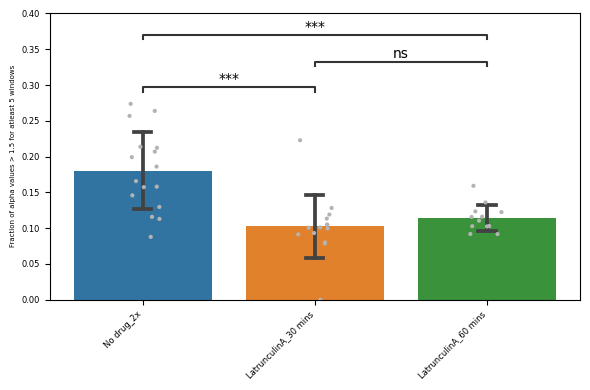

In [10]:
# Plotting
plt.figure(figsize=(6, 4),)
ax = sns.barplot(data=data, x="label", y="fraction_alpha", ci='sd', capsize=0.1, estimator=np.mean)
sns.stripplot(data=data, x="label", y="fraction_alpha", color="0.7", size=3)

# Add statistical annotations
box_pairs = [("No drug_2x", "LatrunculinA_30 mins"), ("No drug_2x", "LatrunculinA_60 mins"), ("LatrunculinA_30 mins", "LatrunculinA_60 mins")]
test_stats = add_stat_annotation(ax, data=data, x="label", y="fraction_alpha", box_pairs=box_pairs, test="t-test_welch", comparisons_correction=None, text_format="star", loc="inside", verbose=2)

plt.xticks(rotation=45, ha="right", fontsize=6)
plt.yticks(fontsize=6)
plt.ylabel("Fraction of alpha values > 1.5 for atleast 5 windows", fontsize=5)
plt.xlabel("")
plt.ylim(0, None)
plt.tight_layout()
plt.show()

In [2]:
def calculate_fraction_of_windows_above_threshold(df, alpha_threshold=1.5):
    return (df['alpha'] > alpha_threshold).mean()

In [3]:
# Use file dialog to select CSV files for each condition
csv_files_1 = filedialog.askopenfilenames(
    title="Select CSV Files for No drug_2x",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_2 = filedialog.askopenfilenames(
    title="Select CSV Files for LatrunculinA_30 mins",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_3 = filedialog.askopenfilenames(
    title="Select CSV Files for LatrunculinA_60 mins",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)

In [5]:
# Calculate the fraction of windows greater than 1.5 for each file
fractions_1 = {file: calculate_fraction_of_windows_above_threshold(pd.read_csv(file)) for file in csv_files_1}
fractions_2 = {file: calculate_fraction_of_windows_above_threshold(pd.read_csv(file)) for file in csv_files_2}
fractions_3 = {file: calculate_fraction_of_windows_above_threshold(pd.read_csv(file)) for file in csv_files_3}

In [6]:
# Create DataFrames for the calculated fractions and assign labels
fractions_df1 = pd.DataFrame(list(fractions_1.items()), columns=["filename", "fraction_alpha"])
fractions_df1["label"] = "No drug_2x"

fractions_df2 = pd.DataFrame(list(fractions_2.items()), columns=["filename", "fraction_alpha"])
fractions_df2["label"] = "LatrunculinA_30 mins"

fractions_df3 = pd.DataFrame(list(fractions_3.items()), columns=["filename", "fraction_alpha"])
fractions_df3["label"] = "LatrunculinA_60 mins"

In [7]:
# Concatenate the dataframes into a single dataframe and save as CSV
data = pd.concat([fractions_df1, fractions_df2, fractions_df3], ignore_index=True)
save_path = r"Z:\Bisal_Halder_turbo\PROCESSED_DATA\Trial_analysis"
csv_file_path = os.path.join(save_path, "fraction_windows_latA_alpha gt 1.5.csv")
data.to_csv(csv_file_path, index=False)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

No drug_2x v.s. LatrunculinA_30 mins: Welch's t-test independent samples, P_val=6.247e-04 stat=3.866e+00
LatrunculinA_30 mins v.s. LatrunculinA_60 mins: Welch's t-test independent samples, P_val=7.024e-01 stat=-3.879e-01
No drug_2x v.s. LatrunculinA_60 mins: Welch's t-test independent samples, P_val=1.260e-04 stat=4.603e+00


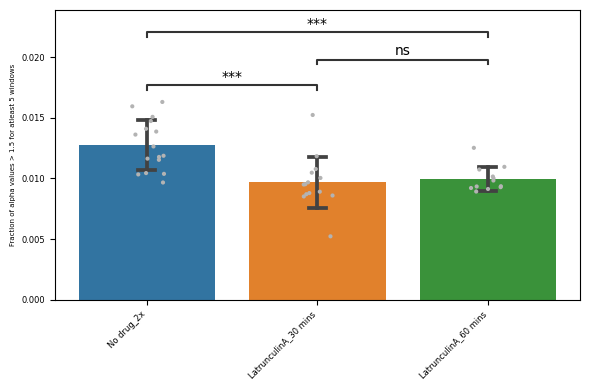

In [8]:
# Plotting
plt.figure(figsize=(6, 4),)
ax = sns.barplot(data=data, x="label", y="fraction_alpha", ci='sd', capsize=0.1, estimator=np.mean)
sns.stripplot(data=data, x="label", y="fraction_alpha", color="0.7", size=3)

# Add statistical annotations
box_pairs = [("No drug_2x", "LatrunculinA_30 mins"), ("No drug_2x", "LatrunculinA_60 mins"), ("LatrunculinA_30 mins", "LatrunculinA_60 mins")]
test_stats = add_stat_annotation(ax, data=data, x="label", y="fraction_alpha", box_pairs=box_pairs, test="t-test_welch", comparisons_correction=None, text_format="star", loc="inside", verbose=2)

plt.xticks(rotation=45, ha="right", fontsize=6)
plt.yticks(fontsize=6)
plt.ylabel("Fraction of alpha values > 1.5 for atleast 5 windows", fontsize=5)
plt.xlabel("")
plt.ylim(0, None)
plt.tight_layout()
plt.show()